## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
# Create array from tabular Data using Numpy.genfromtxt() function

from numpy import genfromtxt
df = genfromtxt("RegData.csv",delimiter=",")
df

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Explore your data

In [3]:
df.shape

(13, 2)

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X, Y = genfromtxt("RegData.csv",delimiter=",", unpack=True)

#### Explore your data

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
Y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

In [7]:
print(X.mean())
print(Y.mean())

5.953846161076923
5.56923073976923


#### Plot the original data (scatter plot of X,y)

In [8]:
df = pd.DataFrame(df, columns=['X', 'Y'])
df

,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


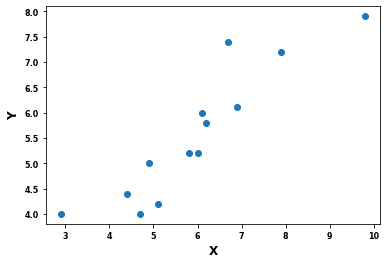

In [9]:
plt.scatter(data=df, x='X', y='Y');
plt.xlabel('X', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8, fontweight='bold');
plt.yticks(fontsize=8, fontweight='bold');
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

In [10]:
theta_0, theta_1 = 0, 0
L = 0.01   #The Learning Rate 

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [11]:
hx = theta_0 + theta_1 * X  # Hypothesis Function

In [12]:
hx

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).


In [13]:
m = len(X)  # Number of training examples
J = (1/2*m) * (np.sum((hx-Y)**2))  # Cost Function

In [14]:
J

2755.6099770680016

### Step4: Calculate the gradient.

In [15]:
GD_1 = (1/m) * (np.sum(hx - Y))
GD_2 = (1/m) * (np.sum((hx - Y) * X))

In [16]:
GD_1

-5.569230739769231

In [17]:
GD_2

-35.043846043215375

### Step5: Update the parameters (simultaneously).

In [18]:
theta_0 = theta_0 - L * GD_1
theta_1 = theta_1 - L * GD_2

In [19]:
theta_0

0.05569230739769231

In [20]:
theta_1

0.35043846043215376

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.

In [21]:
epochs = 1000  # Number of Iterations
cost = []
for i in range(epochs):
    hx = theta_0 + theta_1 * X
    J = (1/2*m) * (np.sum((hx-Y)**2))
    cost.append(J)
    GD_1 = (1/m) * (np.sum(hx - Y))
    GD_2 = (1/m) * (np.sum((hx - Y) * X))
    theta_0 = theta_0 - L * GD_1
    theta_1 = theta_1 - L * GD_2

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [22]:
pred_y = theta_0 + theta_1 * X

In [23]:
pred_y

array([3.09530063, 6.11791068, 4.68614814, 7.07241941, 8.58372462,
       6.27699566, 5.6406565 , 5.7201988 , 5.5611142 , 4.84523274,
       4.52706317, 4.28843627, 5.4020296 ])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

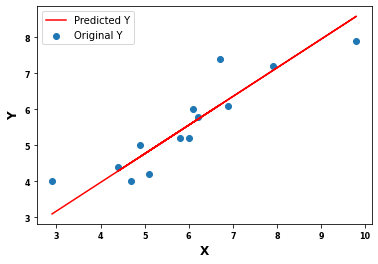

In [24]:
plt.scatter(data=df, x='X', y='Y', label='Original Y')
plt.plot(X, pred_y, label='Predicted Y', c ='red')
plt.xlabel('X', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8, fontweight='bold');
plt.yticks(fontsize=8, fontweight='bold');
plt.legend();
plt.show();

#### Use R2 score to evaluate LR equation output

https://en.wikipedia.org/wiki/Coefficient_of_determination

In [25]:
SS_tot = np.sum((Y - np.mean(Y)) ** 2)
SS_res = np.sum((pred_y - Y)**2)
R_2 =  1 - (SS_res / SS_tot)

In [26]:
R_2

0.8027226692803747

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [27]:
multi_df = genfromtxt('MultipleLR.csv', delimiter=',')
multi_df

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [28]:
multi_df.shape

(25, 4)

In [29]:
multi_X, multi_Y = multi_df[:, :-1], multi_df[:,-1]

In [30]:
multi_X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [31]:
multi_Y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

#### Normalization

In [37]:
norm = np.linalg.norm(multi_X)
multi_X_norm = multi_X / norm

In [38]:
multi_X_norm

array([[0.10420302, 0.11419509, 0.1070579 ],
       [0.1327518 , 0.1256146 , 0.1327518 ],
       [0.12704204, 0.12989692, 0.12846948],
       [0.13703411, 0.13988899, 0.14274387],
       [0.10420302, 0.09421095, 0.09992071],
       [0.07565425, 0.06566218, 0.07850913],
       [0.09849327, 0.10563046, 0.10991278],
       [0.06708962, 0.07993657, 0.08564632],
       [0.12418716, 0.11276765, 0.12846948],
       [0.11276765, 0.09992071, 0.1256146 ],
       [0.09849327, 0.09992071, 0.10420302],
       [0.09992071, 0.09278351, 0.10563046],
       [0.1327518 , 0.13560667, 0.12989692],
       [0.11276765, 0.11419509, 0.10420302],
       [0.09992071, 0.10420302, 0.11134022],
       [0.1327518 , 0.12704204, 0.13703411],
       [0.11134022, 0.1070579 , 0.09706583],
       [0.11562253, 0.12846948, 0.1327518 ],
       [0.1256146 , 0.13132436, 0.12275973],
       [0.11134022, 0.11847741, 0.10991278],
       [0.11704997, 0.12275973, 0.12846948],
       [0.12275973, 0.11704997, 0.12704204],
       [0.

### Repeat your implementation but for more than one variable

In [39]:
multi_theta_0 = 0
theta = np.zeros(multi_X_norm.shape[1])
multi_L = 0.1

In [40]:
theta

array([0., 0., 0.])

In [41]:
multi_hx = multi_theta_0 + np.dot(multi_X_norm, theta)

In [42]:
multi_hx

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
multi_m = len(multi_Y)
multi_J = (1/ (2 * multi_m)) * (np.sum((multi_hx - multi_Y) ** 2))

In [55]:
multi_J

13405.98

In [57]:
multi_GD_1 = (1/multi_m) * (np.sum(multi_hx - multi_Y))
multi_GD_2 = (1/multi_m) * (np.sum((multi_hx - multi_Y)[:, None] * multi_X_norm))

In [58]:
multi_GD_1

-162.04

In [59]:
multi_GD_2

-56.65515486917161

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

#### Use R2 score to evaluate LR equation output

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

#### Train the model (fit the model to the training data)

#### Predict y values using the trained model

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

#### Use R2 score to evaluate model output

### Repeat for Mulivariate